In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
d1 = pd.read_csv('diamonds01.csv')
d2 = pd.read_csv('diamonds02.csv')
d3 = pd.read_csv('diamonds03.csv')
d4 = pd.read_csv('diamonds04.csv')
d5 = pd.read_csv('diamonds05.csv')
df_list = [d1,d2,d3,d4,d5]
df = pd.concat(df_list, ignore_index=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.38,Ideal,E,IF,62.7,55.0,4.61,4.67,2.91,1433
1,1.56,Ideal,F,SI2,61.6,56.0,7.41,7.45,4.58,10210
2,1.01,Ideal,J,SI2,61.9,55.3,6.43,6.50,4.01,4099
3,0.34,Ideal,H,SI1,62.6,56.0,4.46,4.48,2.80,490
4,0.40,Very Good,D,SI2,63.0,59.0,4.64,4.69,2.94,622
...,...,...,...,...,...,...,...,...,...,...
24995,1.18,Very Good,J,SI2,63.5,57.0,6.68,6.74,4.26,4294
24996,1.52,Premium,G,I1,62.3,60.0,7.34,7.28,4.56,4345
24997,0.80,Fair,E,I1,65.5,54.0,5.84,5.68,3.78,1232
24998,1.00,Premium,F,SI1,62.1,59.0,6.39,6.36,3.96,5152


In [2]:
#결측치 확인
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.38,Ideal,E,IF,62.7,55.0,4.61,4.67,2.91,1433
1,1.56,Ideal,F,SI2,61.6,56.0,7.41,7.45,4.58,10210
2,1.01,Ideal,J,SI2,61.9,55.3,6.43,6.50,4.01,4099
3,0.34,Ideal,H,SI1,62.6,56.0,4.46,4.48,2.80,490
4,0.40,Very Good,D,SI2,63.0,59.0,4.64,4.69,2.94,622


C:\Users\wooji\AppData\Local\Temp\ipykernel_22976\580929635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


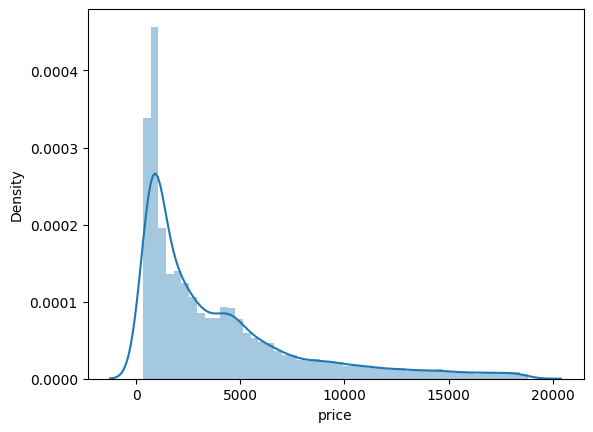

In [4]:
sns.distplot(df['price'])
plt.show()

In [5]:
df['price'].describe()

count    25000.00000
mean      3927.84952
std       3987.61464
min        326.00000
25%        946.00000
50%       2415.50000
75%       5294.00000
max      18823.00000
Name: price, dtype: float64

In [6]:
df['price_band'] = 0
df.loc[df['price']<=946,'price_band'] = 1
df.loc[(df['price']>946)&(df['price']<=2415),'price_band'] = 2
df.loc[(df['price']>2415)&(df['price']<=5294),'price_band'] = 3
df.loc[df['price']>5294,'price_band'] = 4
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,Ideal,E,IF,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,Ideal,F,SI2,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,Ideal,J,SI2,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,Ideal,H,SI1,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,Very Good,D,SI2,63.0,59.0,4.64,4.69,2.94,622,1


In [7]:
df['price_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,price_band
1,6252
3,6251
4,6249
2,6248


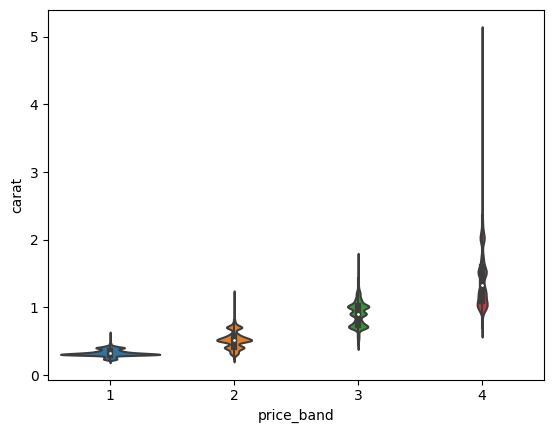

In [8]:
sns.violinplot(x="price_band", y="carat", data=df, jitter=True)
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       25000 non-null  float64
 1   cut         25000 non-null  object 
 2   color       25000 non-null  object 
 3   clarity     25000 non-null  object 
 4   depth       25000 non-null  float64
 5   table       25000 non-null  float64
 6   x           25000 non-null  float64
 7   y           25000 non-null  float64
 8   z           25000 non-null  float64
 9   price       25000 non-null  int64  
 10  price_band  25000 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.1+ MB


In [10]:
def get_outlier(df=None, column=None, weight=1.5):
      # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [11]:
columns = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

for i in columns:
    outlier_idx = get_outlier(df=df, column=i, weight=1.5)
    df.drop(outlier_idx, axis=0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21531 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       21531 non-null  float64
 1   cut         21531 non-null  object 
 2   color       21531 non-null  object 
 3   clarity     21531 non-null  object 
 4   depth       21531 non-null  float64
 5   table       21531 non-null  float64
 6   x           21531 non-null  float64
 7   y           21531 non-null  float64
 8   z           21531 non-null  float64
 9   price       21531 non-null  int64  
 10  price_band  21531 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.0+ MB


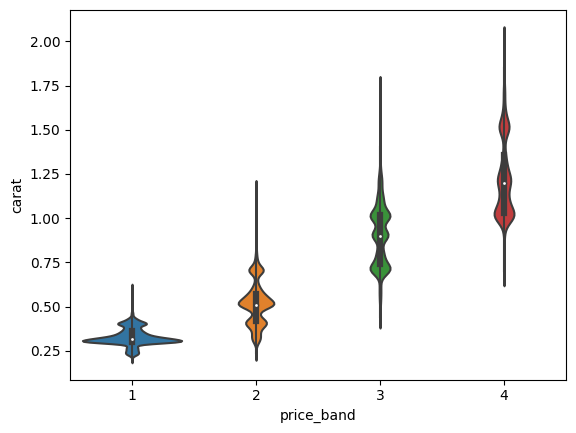

In [13]:
sns.violinplot(x="price_band", y="carat", data=df, jitter=True)
plt.show()

In [14]:
df['cut'].value_counts()

Ideal        9347
Premium      5282
Very Good    5069
Good         1706
Fair          127
Name: cut, dtype: int64

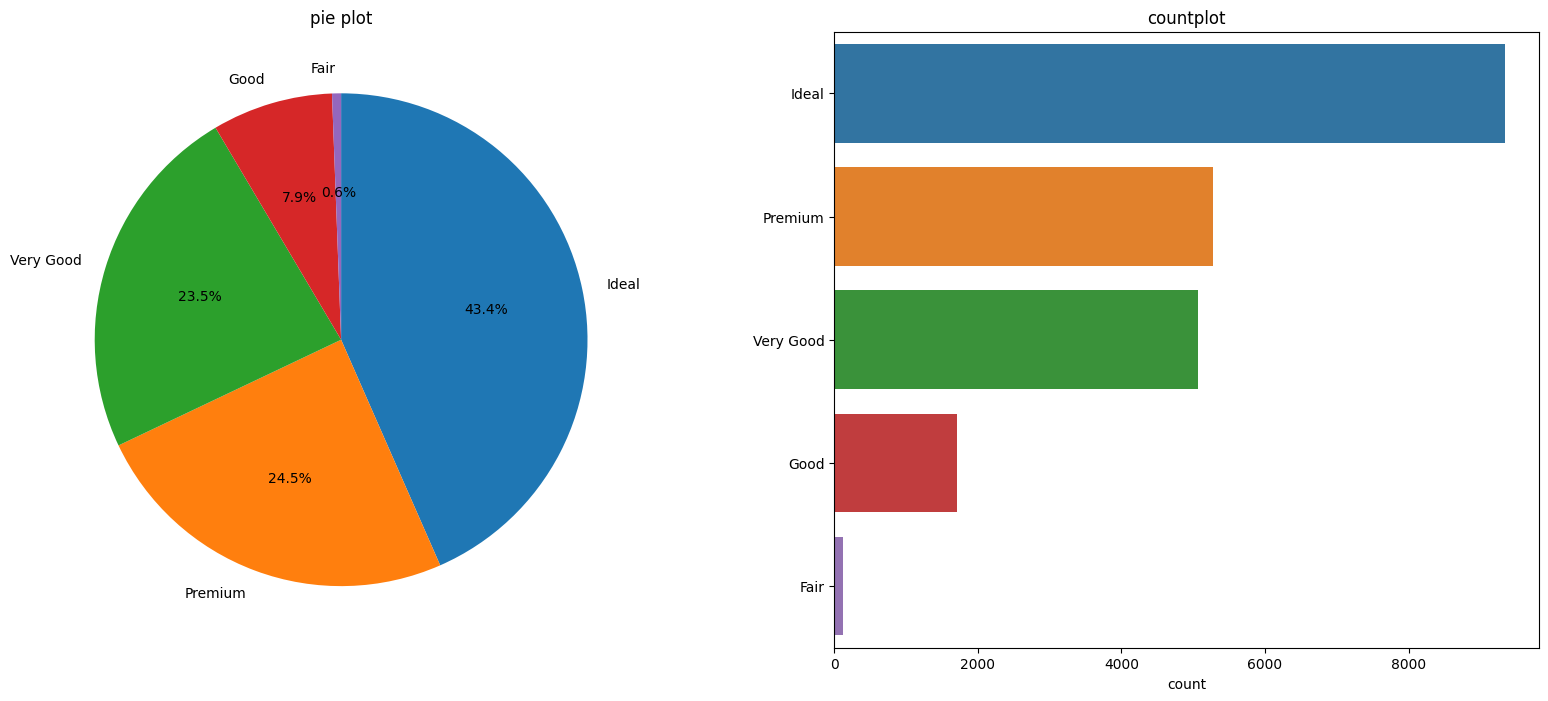

In [15]:
f,ax = plt.subplots(1,2,figsize=(20,8))
val = df['cut'].value_counts().values.tolist()
labels = df['cut'].value_counts().index.tolist()

df['cut'].value_counts().plot.pie( labels = labels, autopct='%.1f%%', counterclock=False, startangle= 90,ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_title('pie plot')
sns.countplot(y = df['cut'],data=df['cut'],order=labels,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('countplot')
plt.show()

In [16]:
df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[1,2,3,4,5],inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,1,E,IF,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,F,SI2,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,J,SI2,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,H,SI1,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,D,SI2,63.0,59.0,4.64,4.69,2.94,622,1
...,...,...,...,...,...,...,...,...,...,...,...
24994,0.31,1,H,VS2,61.4,56.0,4.38,4.42,2.70,507,1
24995,1.18,3,J,SI2,63.5,57.0,6.68,6.74,4.26,4294,3
24996,1.52,2,G,I1,62.3,60.0,7.34,7.28,4.56,4345,3
24998,1.00,2,F,SI1,62.1,59.0,6.39,6.36,3.96,5152,3


In [17]:
df['clarity'].unique()

array(['IF', 'SI2', 'SI1', 'VS1', 'VVS2', 'VS2', 'VVS1', 'I1'],
      dtype=object)

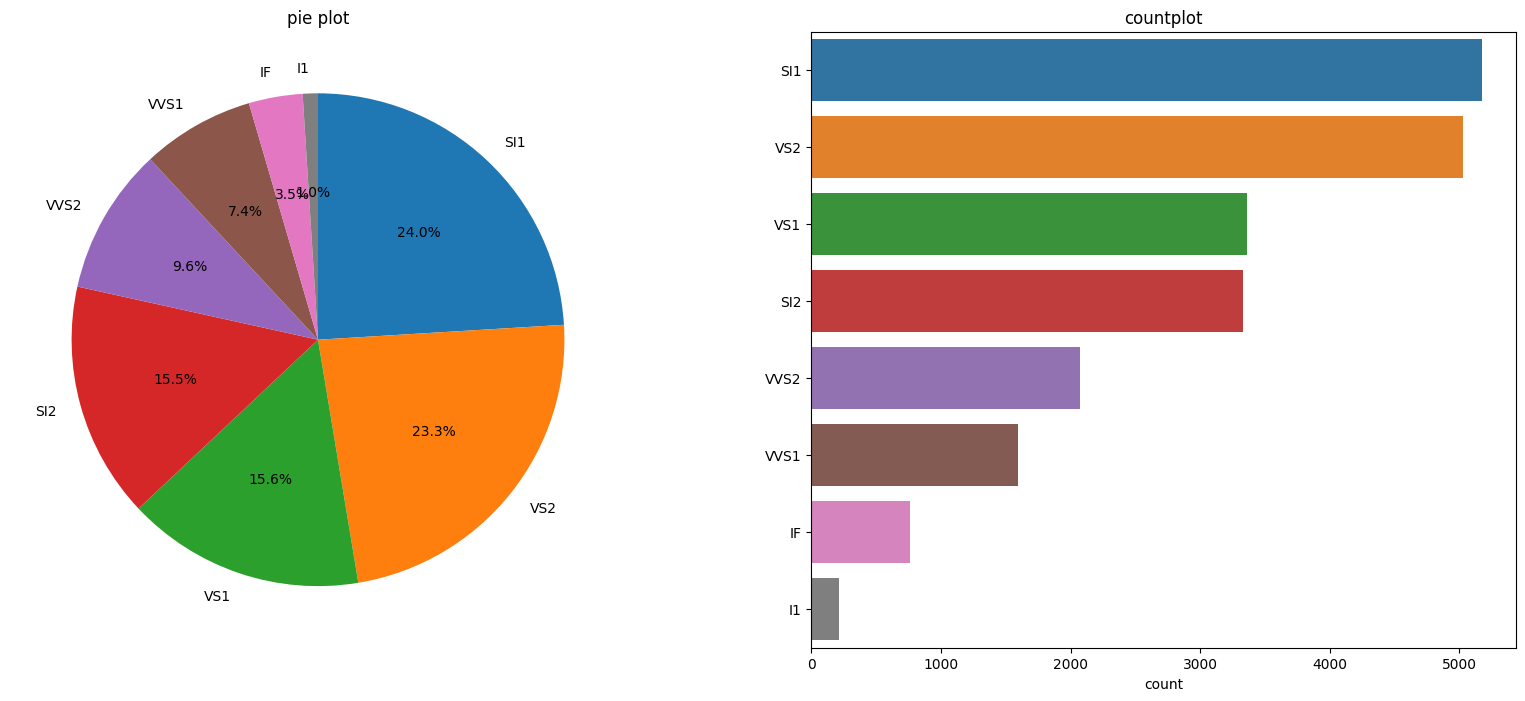

In [18]:
f,ax = plt.subplots(1,2,figsize=(20,8))
val = df['clarity'].value_counts().values.tolist()
labels = df['clarity'].value_counts().index.tolist()

df['clarity'].value_counts().plot.pie( labels = labels, autopct='%.1f%%', counterclock=False, startangle= 90,ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_title('pie plot')
sns.countplot(y = df['clarity'],data=df['clarity'],order=labels,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('countplot')
plt.show()

In [19]:
df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[1,2,3,4,5,6,7,8],inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,1,E,1,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,F,7,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,J,7,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,H,6,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,D,7,63.0,59.0,4.64,4.69,2.94,622,1
...,...,...,...,...,...,...,...,...,...,...,...
24994,0.31,1,H,5,61.4,56.0,4.38,4.42,2.70,507,1
24995,1.18,3,J,7,63.5,57.0,6.68,6.74,4.26,4294,3
24996,1.52,2,G,8,62.3,60.0,7.34,7.28,4.56,4345,3
24998,1.00,2,F,6,62.1,59.0,6.39,6.36,3.96,5152,3


In [20]:
df['color'].unique()

array(['E', 'F', 'J', 'H', 'D', 'I', 'G'], dtype=object)

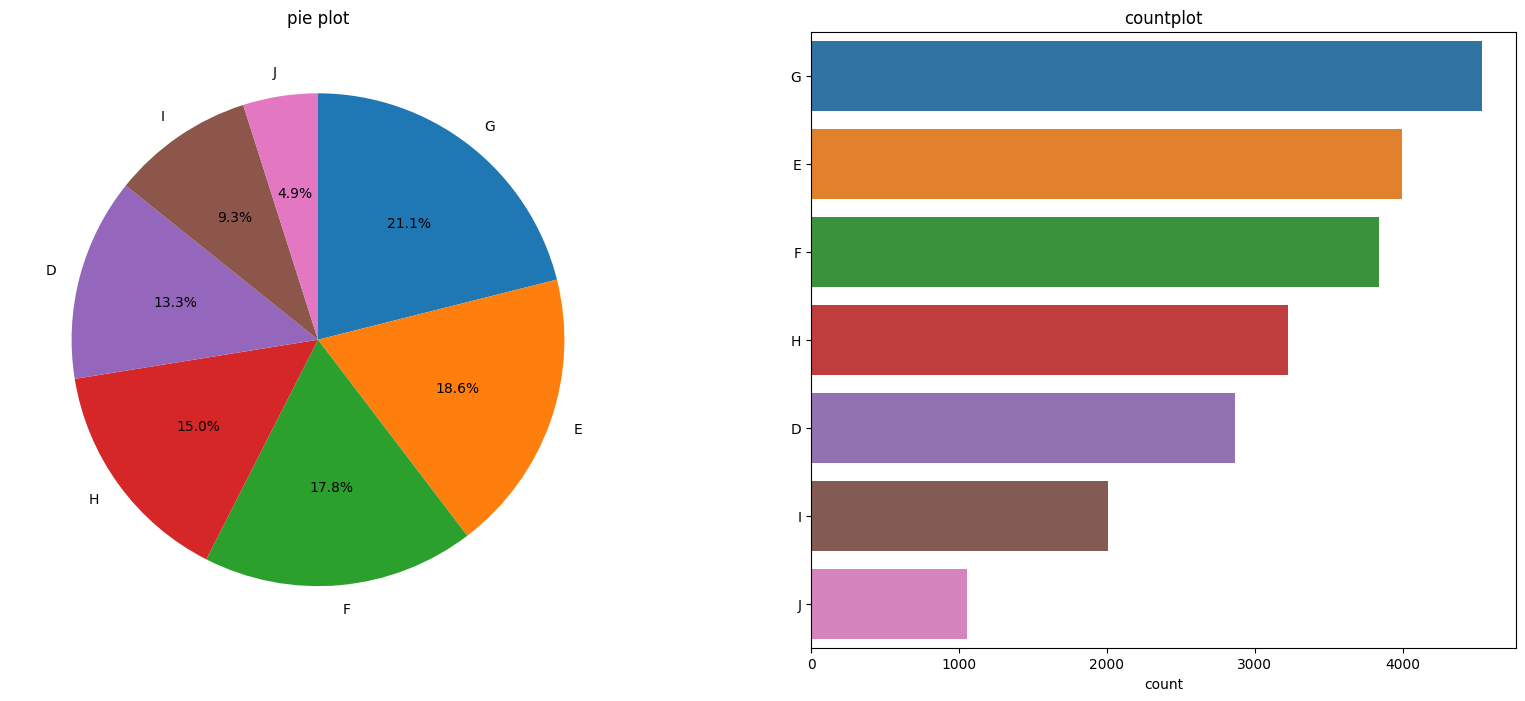

In [21]:
f,ax = plt.subplots(1,2,figsize=(20,8))
val = df['color'].value_counts().values.tolist()
labels = df['color'].value_counts().index.tolist()

df['color'].value_counts().plot.pie( labels = labels, autopct='%.1f%%', counterclock=False, startangle= 90,ax = ax[0])
ax[0].set_ylabel('')
ax[0].set_title('pie plot')
sns.countplot(y = df['color'],data=df['color'],order=labels,ax=ax[1])
ax[1].set_ylabel('')
ax[1].set_title('countplot')
plt.show()

In [22]:
df['color'].replace(['D','E','F','G','H','I','J'],[1,2,3,4,5,6,7],inplace=True)
df

,carat,cut,color,clarity,depth,table,x,y,z,price,price_band
0,0.38,1,2,1,62.7,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,3,7,61.6,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,7,7,61.9,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,5,6,62.6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,1,7,63.0,59.0,4.64,4.69,2.94,622,1
...,...,...,...,...,...,...,...,...,...,...,...
24994,0.31,1,5,5,61.4,56.0,4.38,4.42,2.70,507,1
24995,1.18,3,7,7,63.5,57.0,6.68,6.74,4.26,4294,3
24996,1.52,2,4,8,62.3,60.0,7.34,7.28,4.56,4345,3
24998,1.00,2,3,6,62.1,59.0,6.39,6.36,3.96,5152,3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21531 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       21531 non-null  float64
 1   cut         21531 non-null  int64  
 2   color       21531 non-null  int64  
 3   clarity     21531 non-null  int64  
 4   depth       21531 non-null  float64
 5   table       21531 non-null  float64
 6   x           21531 non-null  float64
 7   y           21531 non-null  float64
 8   z           21531 non-null  float64
 9   price       21531 non-null  int64  
 10  price_band  21531 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.5 MB


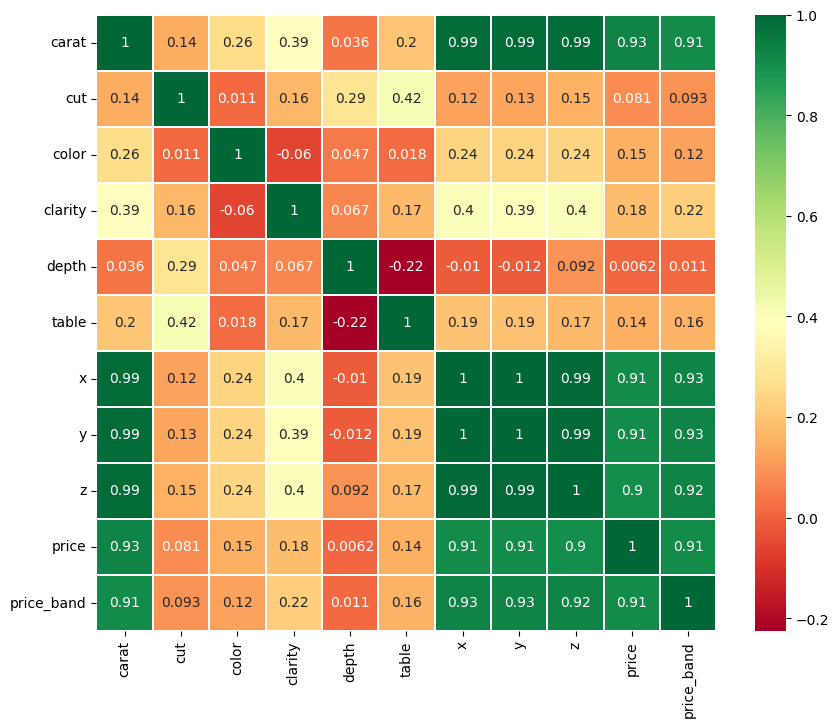

In [24]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

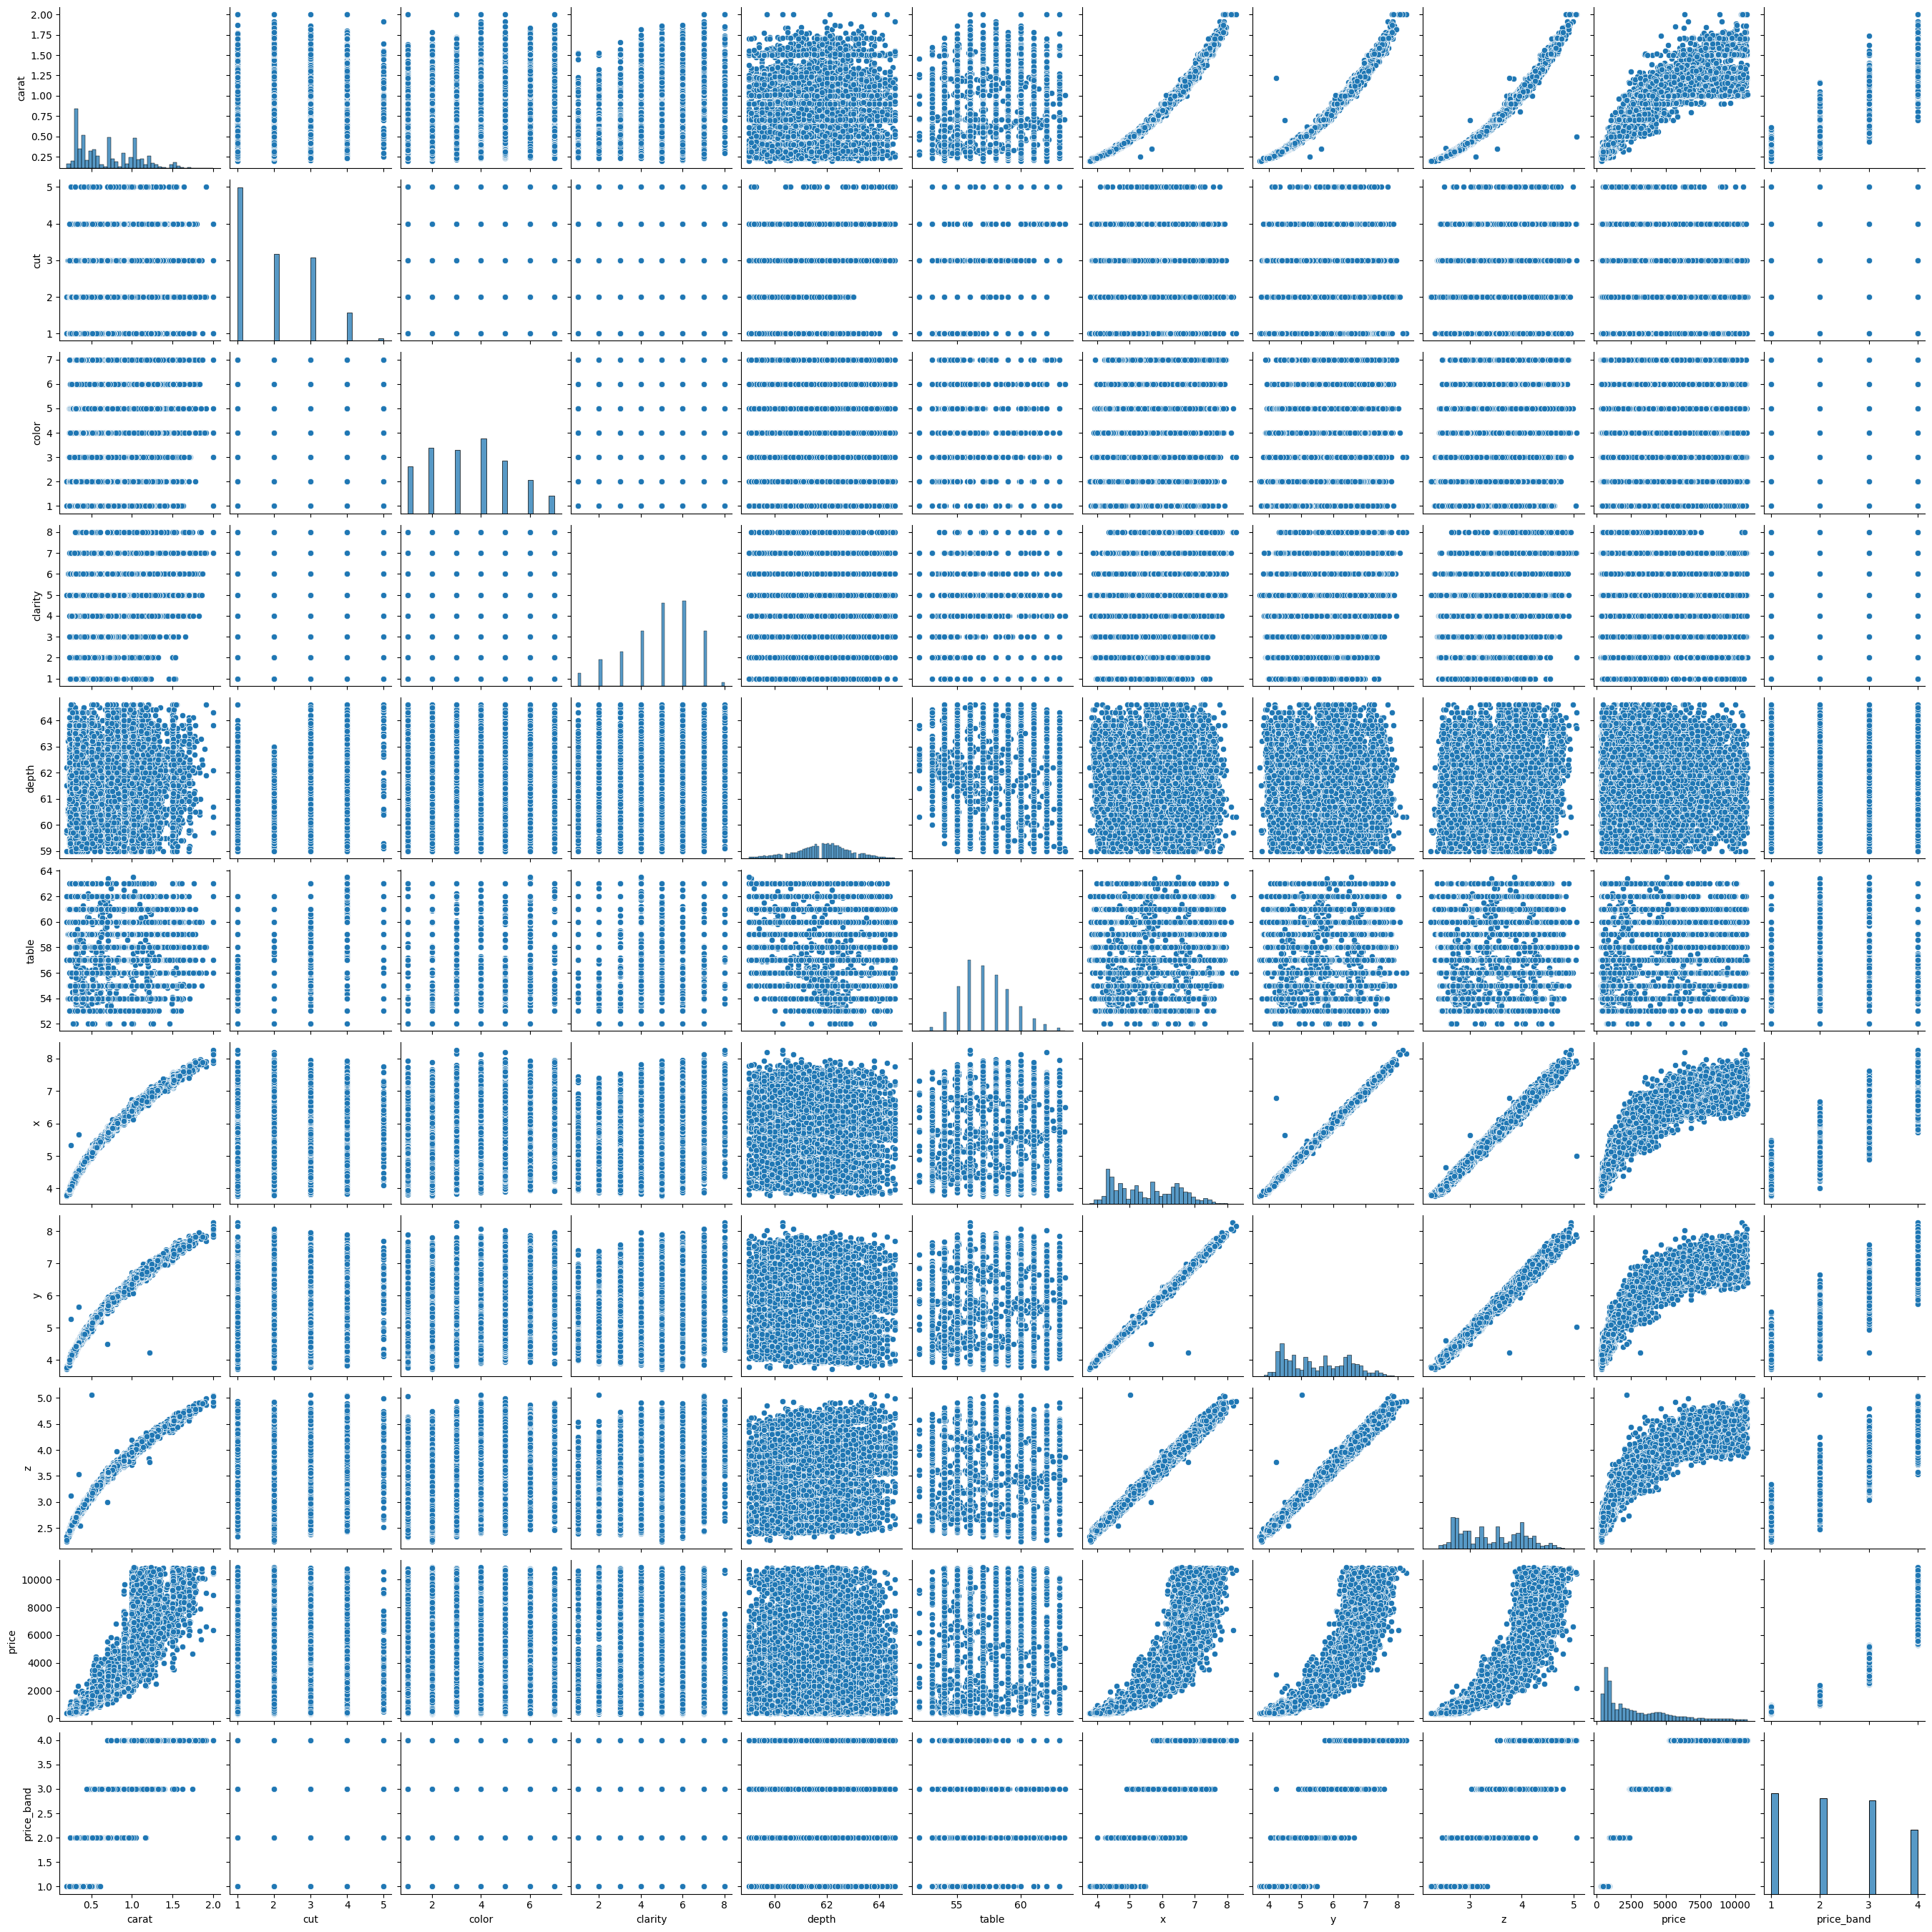

In [25]:
sns.pairplot(data=df)
plt.show()

In [26]:
df = df.drop(['depth'],axis = 1)
df.head(5)

,carat,cut,color,clarity,table,x,y,z,price,price_band
0,0.38,1,2,1,55.0,4.61,4.67,2.91,1433,2
1,1.56,1,3,7,56.0,7.41,7.45,4.58,10210,4
2,1.01,1,7,7,55.3,6.43,6.50,4.01,4099,3
3,0.34,1,5,6,56.0,4.46,4.48,2.80,490,1
4,0.40,3,1,7,59.0,4.64,4.69,2.94,622,1


In [27]:
data = df.drop('price', axis=1).values
target = df['price'].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [29]:
X_train

array([[0.7 , 1.  , 4.  , ..., 5.74, 3.53, 3.  ],
       [0.23, 1.  , 4.  , ..., 3.99, 2.45, 1.  ],
       [0.32, 1.  , 3.  , ..., 4.46, 2.75, 1.  ],
       ...,
       [0.9 , 2.  , 2.  , ..., 6.24, 3.76, 3.  ],
       [0.3 , 3.  , 1.  , ..., 4.31, 2.67, 1.  ],
       [0.23, 1.  , 4.  , ..., 3.96, 2.45, 1.  ]])

In [30]:
X_test

array([[1.02, 1.  , 1.  , ..., 6.44, 4.02, 4.  ],
       [1.1 , 4.  , 2.  , ..., 6.58, 4.15, 3.  ],
       [1.01, 2.  , 1.  , ..., 6.34, 3.77, 3.  ],
       ...,
       [1.01, 3.  , 3.  , ..., 6.43, 3.83, 3.  ],
       [0.35, 1.  , 2.  , ..., 4.53, 2.83, 1.  ],
       [1.2 , 3.  , 6.  , ..., 6.74, 4.22, 4.  ]])

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.925871013571569
0.9215677986827235


Linear Regression : 0.9215677986827235

In [33]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 5, include_bias=False) #최고 차수를 5제곱까지 특성을 만든다.
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(16148, 2001)


In [34]:
lr.fit(train_poly,y_train)

LinearRegression()

In [35]:
poly = PolynomialFeatures(degree = 5, include_bias=False) #최고 차수를 5제곱까지 특성을 만든다.
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(16148, 2001)


In [36]:
lr.fit(train_poly,y_train)
print(lr.score(train_poly,y_train))

0.9874304363243139


In [37]:
print(lr.score(test_poly,y_test)) #과대적합, 규제 필요요

-544.4642423716092


In [38]:
#표준점수로 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [39]:
#릿지 회귀 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))

0.9842181106917084


In [40]:
print(ridge.score(test_scaled, y_test)) #정상

0.9824575227474375


In [41]:
#최적의 alpha 값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [42]:
alpha_list = [0.0001,0.001,0.01,0.1,1,10] #10배씩 늘리기
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

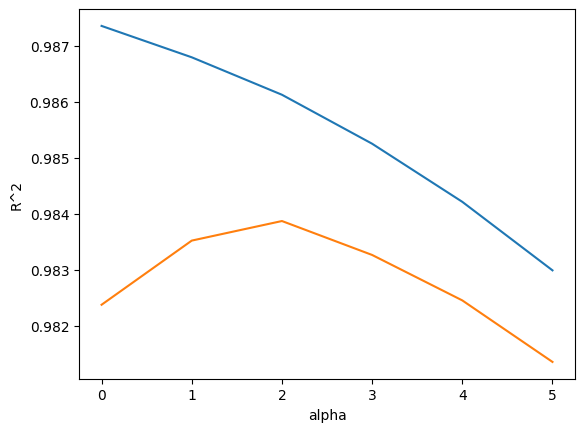

In [43]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [44]:
ridge = Ridge(alpha = 0.01)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9861306047387695
0.9838751895486659


※ Ridge Regression : 0.9838751895486659

In [45]:
#라쏘 회귀 규제
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9806500415870973
0.9788060544392752


c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.333e+08, tolerance: 1.057e+07
  model = cd_fast.enet_coordinate_descent(


In [46]:
train_score = []
test_score = []
alpha_list = [0.00001,0.0001,0.001,0.01,0.1,1] #10배씩 늘리기
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.180e+08, tolerance: 1.057e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.178e+08, tolerance: 1.057e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

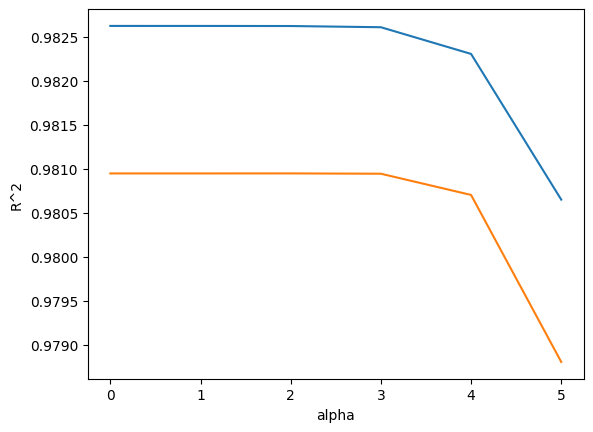

In [47]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [48]:
lasso = Lasso(alpha = 0.001)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9826223650501812
0.9809478310100266


c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.162e+08, tolerance: 1.057e+07
  model = cd_fast.enet_coordinate_descent(


※ Lasso Regression : 0.9809478310100266

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.n_neighbors = 3
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.9832785795444643
0.9621715372892434


In [50]:
train_score = []
test_score = []
n_list = [i for i in range(1,10)]
for i in n_list:
    knr = KNeighborsRegressor(n_neighbors = i)
    knr.fit(X_train, y_train)
    train_score.append(knr.score(X_train, y_train))
    test_score.append(knr.score(X_test, y_test))

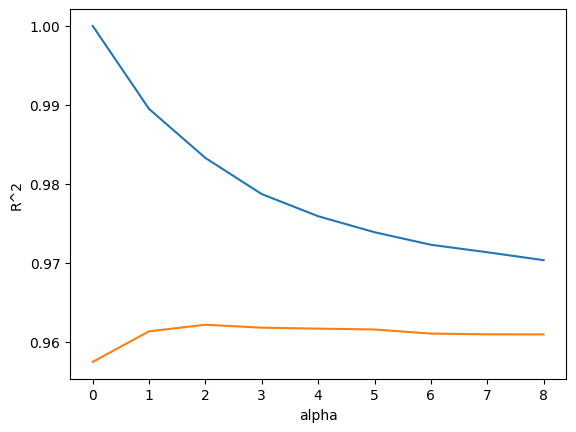

In [51]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [52]:
knr.n_neighbors = 3
knr.fit(X_train, y_train)
print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

0.9832785795444643
0.9621715372892434


※ KNeighbors Regressor : 0.9621715372892434

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
train_scaled = ss.transform(X_train)
test_scaled = ss.transform(X_test)

In [54]:
from sklearn.linear_model import SGDRegressor
sg = SGDRegressor(max_iter=100,random_state=1, verbose=1)
sg.fit(train_scaled, y_train)
print(sg.score(train_scaled, y_train))
print(sg.score(test_scaled, y_test))

-- Epoch 1
Norm: 1687.23, NNZs: 9, Bias: 2955.333856, T: 16148, Avg. loss: 380878.457926
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2059.28, NNZs: 9, Bias: 2960.043537, T: 32296, Avg. loss: 295567.780368
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2345.85, NNZs: 9, Bias: 2971.669360, T: 48444, Avg. loss: 279434.929219
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2582.61, NNZs: 9, Bias: 2964.224048, T: 64592, Avg. loss: 269239.650019
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2779.99, NNZs: 9, Bias: 2963.292522, T: 80740, Avg. loss: 262888.339155
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2945.07, NNZs: 9, Bias: 2970.423645, T: 96888, Avg. loss: 258174.040252
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 3078.70, NNZs: 9, Bias: 2952.813638, T: 113036, Avg. loss: 255092.157618
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 3187.64, NNZs: 9, Bias: 2967.381980, T: 129184, Avg. loss: 252813.718911
Total training time: 0.02 seconds.
-- Epo

※ SGD Regressor : 0.92067069440431

In [55]:
from sklearn.tree import DecisionTreeRegressor 

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

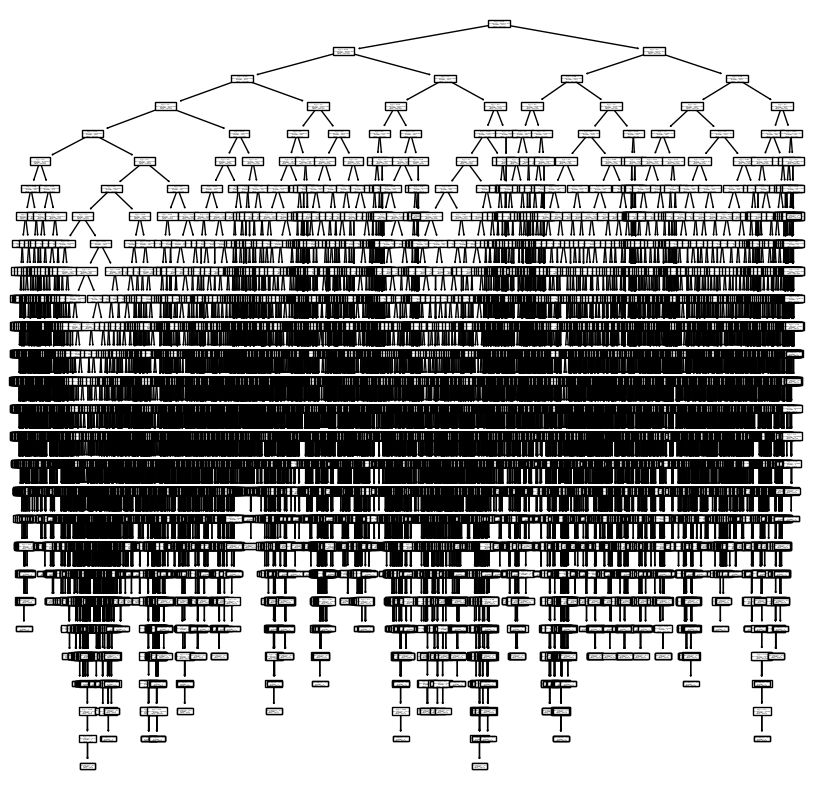

In [56]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()

In [57]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9999963808278516
0.976708137102448


※ DecisionTree Regressor : 0.976708137102448

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

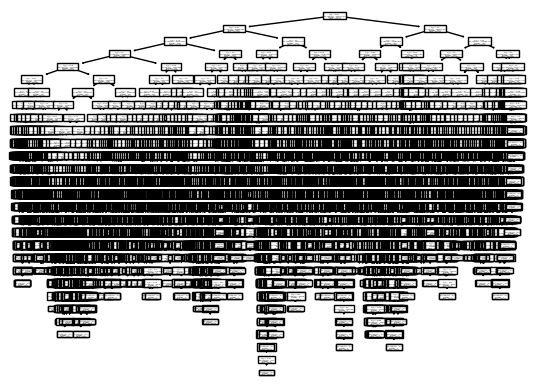

In [59]:
rfTree= rf.estimators_[0]
plot_tree(rfTree)
plt.show()

In [60]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9981457208391157
0.9861568168033663


※ RandomForest Regressor : 0.9861568168033663